In [1]:
import pandas as pd
import numpy as np
import math as m
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.stats import linregress

nan = float("nan")

Allometric functions that FATES currently uses.

In [2]:
def d2h_chave2014(d,p1,p2,p3):
    h = np.exp( p1 + p2*np.log(d) + p3*np.log(d)**2.0)
    return(h)

def d2h_poorter2006(d,p1,p2,p3):
    h = p1*(1.0 - np.exp(p2*d**p3))
    return(h)

def d2h_2pwr(d,p1,p2):
    h = p1*d**p2
    return(h)

def d2h_obrien(d,p1,p2):
    h = 10.0**(np.log10(d)*p1+p2)
    return(h)

def d2h_martcano(d,p1,p2,p3):
    h = (p1*d**p2)/(p3+d**p2)
    return(h)

def carea_2pwr(d, p1, p2):
    c = p1 * d ** p2
    return(c)

def d2blmax_salda(d,p1,p2,p3,rho):
    blmax = p1 * d**p2 * rho**p3
    return(blmax)

def d2blmax_2pwr(d,p1,p2):
    c2b = 2.0
    blmax    = (p1*d**p2) / c2b
    return(bllmax)
    

this data is from: 
McPherson, E. Gregory; van Doorn, Natalie S.; Peper, Paula J. 2016. Urban tree database. Fort Collins, CO: Forest Service Research Data Archive. Updated 21 January 2020. https://doi.org/10.2737/RDS-2016-0005

In [3]:
usfs_data = pd.read_csv('RDS-2016-0005/Data/TS3_Raw_tree_data.csv')
usfs_data[usfs_data['Leaf (m2)'] < 0] = nan

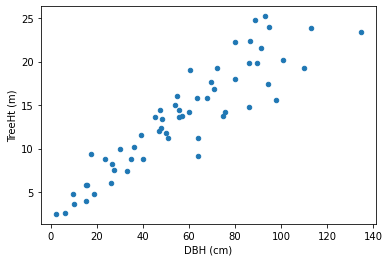

In [4]:
quercus_ag = usfs_data[usfs_data.ScientificName == 'Quercus agrifolia ']
quercus_ag.plot.scatter('DBH (cm)', 'TreeHt (m)')

[ 0.70116837 -0.08110608]
[ 4.65041171e+01 -1.15696470e-02  8.55482307e-01]
[0.82964977 0.7011679 ]
[-0.71437105  0.96904822 -0.0334716 ]
[ 83.41009103   0.85071036 150.81922789]


/Users/cdkoven/miniconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Users/cdkoven/miniconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


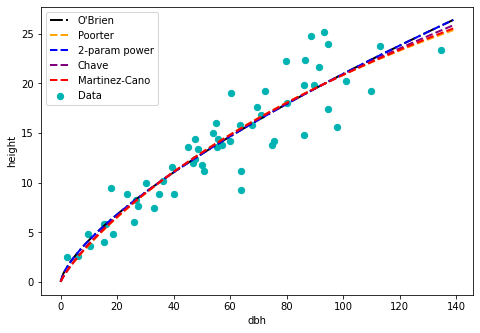

In [5]:
pars_obrien, cov_obrien = curve_fit(f=d2h_obrien, xdata=quercus_ag['DBH (cm)'], ydata=quercus_ag['TreeHt (m)'])
print(pars_obrien)
pars_poorter2006, cov_poorter2006 = curve_fit(f=d2h_poorter2006, xdata=quercus_ag['DBH (cm)'], ydata=quercus_ag['TreeHt (m)'], p0=[10,-0.01,1])
print(pars_poorter2006)
pars_2pwr, cov_2pwr = curve_fit(f=d2h_2pwr, xdata=quercus_ag['DBH (cm)'], ydata=quercus_ag['TreeHt (m)'])
print(pars_2pwr)
pars_chave2014, cov_chave2014 = curve_fit(f=d2h_chave2014, xdata=quercus_ag['DBH (cm)'], ydata=quercus_ag['TreeHt (m)'])
print(pars_chave2014)
pars_martcano, cov_martcano = curve_fit(f=d2h_martcano, xdata=quercus_ag['DBH (cm)'], ydata=quercus_ag['TreeHt (m)'], p0=[10,1,100])
print(pars_martcano)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel('dbh')
ax.set_ylabel('height')
ax.scatter(quercus_ag['DBH (cm)'], quercus_ag['TreeHt (m)'], s=40, color='#00b3b3', label='Data')
ax.plot(np.arange(140), d2h_obrien(np.arange(140), *pars_obrien), linestyle='-.', linewidth=2, color='black', label="O'Brien")
ax.plot(np.arange(140), d2h_poorter2006(np.arange(140), *pars_poorter2006), linestyle='--', linewidth=2, color='orange', label="Poorter")
ax.plot(np.arange(140), d2h_2pwr(np.arange(140), *pars_2pwr), linestyle='--', linewidth=2, color='blue', label="2-param power")
ax.plot(np.arange(140), d2h_chave2014(np.arange(140), *pars_chave2014), linestyle='--', linewidth=2, color='purple', label="Chave")

ax.plot(np.arange(140), d2h_martcano(np.arange(140), *pars_martcano), linestyle='--', linewidth=2, color='red', label="Martinez-Cano")
ax.legend()




[0.51860961 1.432756  ]


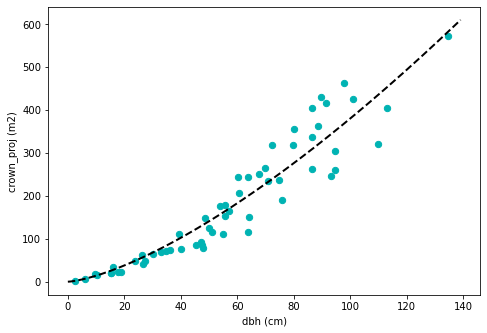

In [6]:
pars, cov = curve_fit(f=carea_2pwr, xdata=quercus_ag['DBH (cm)'], ydata=m.pi/4.*quercus_ag['AvgCdia (m)']**2.)
print(pars)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel('dbh (cm)')
ax.set_ylabel('crown_proj (m2)')
ax.scatter(quercus_ag['DBH (cm)'], m.pi/4.*quercus_ag['AvgCdia (m)']**2., s=40, color='#00b3b3', label='Data')
ax.plot(np.arange(140), carea_2pwr(np.arange(140), *pars), linestyle='--', linewidth=2, color='black')

[0.52389437 1.64366091]


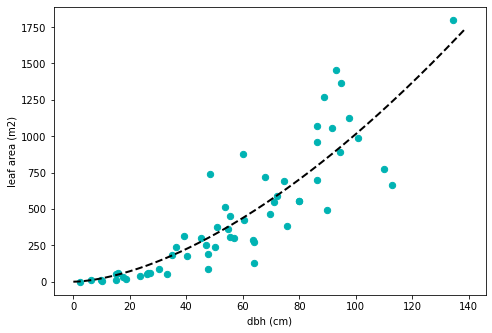

In [7]:
pars, cov = curve_fit(f=carea_2pwr, xdata=quercus_ag['DBH (cm)'], ydata=quercus_ag['Leaf (m2)'])
print(pars)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel('dbh (cm)')
ax.set_ylabel('leaf area (m2)')
ax.scatter(quercus_ag['DBH (cm)'], quercus_ag['Leaf (m2)'], s=40, color='#00b3b3', label='Data')
ax.plot(np.arange(140), carea_2pwr(np.arange(140), *pars), linestyle='--', linewidth=2, color='black')